## RFM Analysis

### Business Understanding
#### Problem Statement
Jaya Abadi wants to seize the opportunity to launch a campaign at the start of the year in response to the growing number of e-commerce companies. However, to ensure that the campaign is successful, the company must first identify the target customer if the campaign is a successful segment.

#### Goals
Utilizing the RFM analysis method, find out consumer segment information.

In [1]:
import pandas as pd

#### Data Understanding

In [2]:
df = pd.read_csv("e-commerce dataset - rfm analysis.csv", encoding='unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
print("%d rows and %d columns" % df.shape)

541909 rows and 8 columns


In [4]:
# short info about dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
# check missing value

df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

- There are any missing values in columns CustomerID and Description
- Column InvoiceDate should be of the "datetime" data type

In [6]:
# check desc statistic in numerical columns

df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
# check desc statistic in categorical columns

df.describe(include="O")

,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,541909,541909,540455,541909,541909
unique,25900,4070,4223,23260,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,10/31/2011 14:41,United Kingdom
freq,1114,2313,2369,1114,495478


- In the Quantity and UnitPrice columns there are negative values, the std value is also far from the mean value, indicating that there are outliers

#### Data Preparation (Cleaning)

In [8]:
df.shape

(541909, 8)

In [9]:
# how many rows at least one missing value

(df.isna().sum(axis=1) > 0).sum()

135080

- Missing values in the Description and CustomerID columns will be dropped

In [10]:
df.dropna(inplace = True)

In [11]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [12]:
df.shape

(406829, 8)

In [13]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
# change datatype in column InvoiceDate

df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

In [15]:
df["CustomerID"] = df["CustomerID"].astype(str) 

In [16]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
dtype: object

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

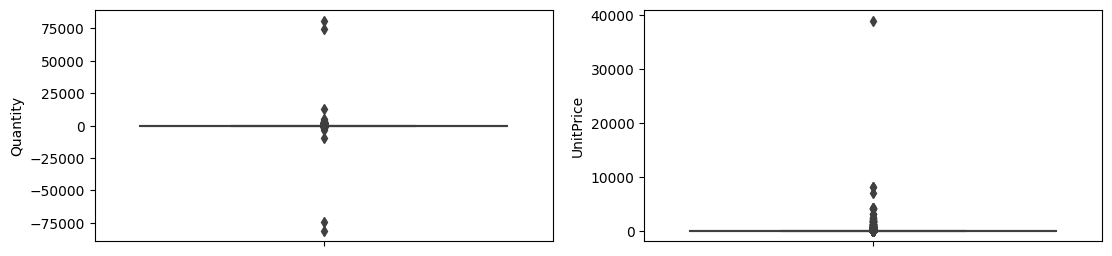

In [18]:
# check outliers using boxplot

col_outliers = ["Quantity", "UnitPrice"]

plt.figure(figsize = (13,3))
for i in range(0, len(col_outliers)):
    plt.subplot(1, 2, i+1)
    sns.boxplot(y = df[col_outliers[i]])
plt.show()

In [19]:
# check rows data based on criteria value

drop_value = df[(df["UnitPrice"] > 20000) | (df["UnitPrice"] < 0) | (df["Quantity"] > 2000) | (df["Quantity"] < 0)]
drop_value

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [20]:
df[(df["Description"] == "WHITE HANGING HEART T-LIGHT HOLDER") & (df["Quantity"] <= 0)].sort_values(by = ["Quantity"]).head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
160143,C550456,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-1930,2011-04-18 13:08:00,2.55,15749.0,United Kingdom
34292,C539329,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-500,2010-12-17 09:37:00,2.55,16013.0,United Kingdom
38444,C539576,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-24,2010-12-20 12:25:00,2.95,14911.0,EIRE
221921,C556293,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-18,2011-06-10 09:30:00,2.95,13094.0,United Kingdom
186102,C552849,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-12,2011-05-11 14:52:00,2.95,14367.0,United Kingdom
353159,C567767,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-12,2011-09-22 10:58:00,2.95,17460.0,United Kingdom
141429,C548513,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-8,2011-03-31 15:54:00,2.55,13777.0,United Kingdom
111969,C545852,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-8,2011-03-07 13:49:00,2.95,14048.0,United Kingdom
323021,C565237,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-8,2011-09-02 09:47:00,2.95,14299.0,United Kingdom
146110,C548972,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-6,2011-04-05 11:42:00,2.95,15674.0,United Kingdom


- For example, in the Description column "WHITE HANGING HEART T-LIGHT HOLDER" the quantity of minus values varies greatly with the UnitPrice being almost the same
- The minus values in the Quantity and UnitPrice columns will be dropped

In [21]:
# drop negative value in columns Quantity and UnitPrice

drop_value = df[(df["UnitPrice"] > 20000) | (df["UnitPrice"] < 0) | (df["Quantity"] > 2000) | (df["Quantity"] < 0)].index
df.drop(drop_value, inplace = True)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [22]:
# check duplicated data

df[df.duplicated(keep = False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


- There are 10001 rows duplicated values
- Duplicated values will also be dropped

In [23]:
# drop duplicated value

df.drop_duplicates()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [24]:
df.describe()

,Quantity,InvoiceDate,UnitPrice
count,397903.000000,397903,397903.000000
mean,12.469305,2011-07-10 23:46:19.422874624,3.116292
min,1.000000,2010-12-01 08:26:00,0.000000
25%,2.000000,2011-04-07 11:12:00,1.250000
50%,6.000000,2011-07-31 14:39:00,1.950000
75%,12.000000,2011-10-20 14:33:00,3.750000
max,2000.000000,2011-12-09 12:50:00,8142.750000
std,37.883919,NaN,22.097365


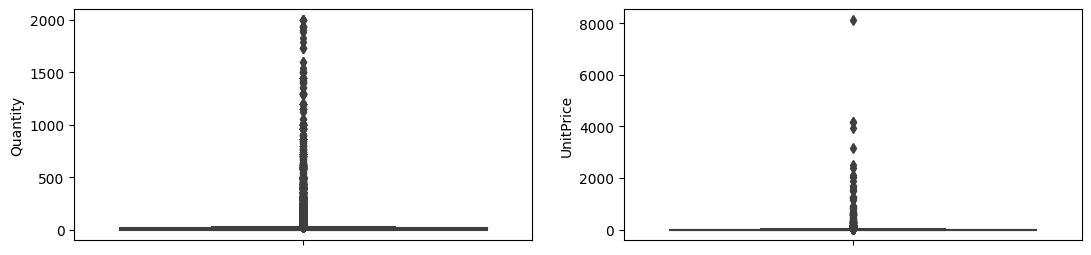

In [25]:
# ensure there are no outliers

col_outliers = ["Quantity", "UnitPrice"]

plt.figure(figsize = (13,3))
for i in range(0, len(col_outliers)):
    plt.subplot(1, 2, i+1)
    sns.boxplot(y = df[col_outliers[i]])
plt.show()

- there is 1 value far from the mean

In [26]:
df[(df["UnitPrice"] > 300)].sort_values(by="UnitPrice").head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
153345,549739,M,Manual,1,2011-04-12 09:35:00,308.82,15935.0,United Kingdom
96678,544578,M,Manual,1,2011-02-21 14:04:00,320.69,12365.0,Cyprus
182482,552549,M,Manual,1,2011-05-10 10:39:00,334.71,15674.0,United Kingdom
400625,571326,M,Manual,1,2011-10-17 11:11:00,339.02,12783.0,Portugal
142988,548661,POST,POSTAGE,1,2011-04-01 14:28:00,350.00,12415.0,Australia
106398,545332,M,Manual,1,2011-03-01 15:52:00,376.50,12352.0,Norway
249272,558895,M,Manual,1,2011-07-04 15:54:00,389.68,12619.0,Germany
171468,551419,M,Manual,1,2011-04-28 13:51:00,400.00,12748.0,United Kingdom
455620,575632,M,Manual,1,2011-11-10 13:44:00,424.06,12473.0,Germany
271252,560651,M,Manual,1,2011-07-20 11:38:00,451.42,15802.0,United Kingdom


- PICNIC BASKET WICKER 60 PIECES in description will drop

In [27]:
# unclear indication of value in description

df[(df["Description"] == "Manual") | (df["Description"] == "POSTAGE") | (df["Description"] == "DOTCOM POSTAGE")]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.00,12583.0,France
386,536403,POST,POSTAGE,1,2010-12-01 11:27:00,15.00,12791.0,Netherlands
1123,536527,POST,POSTAGE,1,2010-12-01 13:04:00,18.00,12662.0,Germany
2239,536569,M,Manual,1,2010-12-01 15:35:00,1.25,16274.0,United Kingdom
2250,536569,M,Manual,1,2010-12-01 15:35:00,18.95,16274.0,United Kingdom
...,...,...,...,...,...,...,...,...
541198,581493,POST,POSTAGE,1,2011-12-09 10:10:00,15.00,12423.0,Belgium
541216,581494,POST,POSTAGE,2,2011-12-09 10:13:00,18.00,12518.0,Germany
541730,581570,POST,POSTAGE,1,2011-12-09 11:59:00,18.00,12662.0,Germany
541767,581574,POST,POSTAGE,2,2011-12-09 12:09:00,18.00,12526.0,Germany


In [28]:
remove_values = [ "Manual",  "POSTAGE", "DOTCOM POSTAGE", "PICNIC BASKET WICKER 60 PIECES"]
df = df[~df["Description"].isin(remove_values)]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


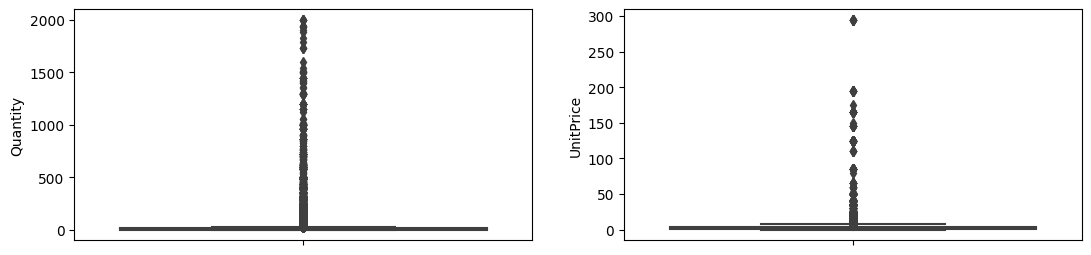

In [29]:
col_outliers = ["Quantity", "UnitPrice"]

plt.figure(figsize = (13,3))
for i in range(0, len(col_outliers)):
    plt.subplot(1, 2, i+1)
    sns.boxplot(y = df[col_outliers[i]])
plt.show()

In [30]:
df.describe()

,Quantity,InvoiceDate,UnitPrice
count,396496.000000,396496,396496.000000
mean,12.487384,2011-07-11 00:08:58.229338880,2.880982
min,1.000000,2010-12-01 08:26:00,0.000000
25%,2.000000,2011-04-07 11:16:00,1.250000
50%,6.000000,2011-07-31 14:39:00,1.950000
75%,12.000000,2011-10-20 14:41:00,3.750000
max,2000.000000,2011-12-09 12:50:00,295.000000
std,37.761337,NaN,4.105578


In [31]:
df.describe(include = "O")

,InvoiceNo,StockCode,Description,CustomerID,Country
count,396496,396496,396496,396496,396496
unique,18406,3661,3872,4332,37
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,17841.0,United Kingdom
freq,541,2035,2028,7838,354030


In [32]:
df["Date"] = pd.to_datetime(df["InvoiceDate"]).dt.strftime('%Y-%m')

In [33]:
InvoiceDate_dt = df["InvoiceDate"].dt
df["Day"] = InvoiceDate_dt.day_name()

In [57]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,Wednesday


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 396496 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    396496 non-null  object        
 1   StockCode    396496 non-null  object        
 2   Description  396496 non-null  object        
 3   Quantity     396496 non-null  int64         
 4   InvoiceDate  396496 non-null  datetime64[ns]
 5   UnitPrice    396496 non-null  float64       
 6   CustomerID   396496 non-null  object        
 7   Country      396496 non-null  object        
 8   Date         396496 non-null  object        
 9   Day          396496 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 33.3+ MB


### Analysis using RFM

In [35]:
df["InvoiceNo"].nunique()

18406

In [36]:
df["InvoiceNo"].count()

396496

In [37]:
min(df["InvoiceDate"])

Timestamp('2010-12-01 08:26:00')

In [38]:
max(df["InvoiceDate"])

Timestamp('2011-12-09 12:50:00')

In [39]:
df_day = df.groupby("Day")["InvoiceNo"].nunique().sort_values(ascending=False)
df_day

Day
Thursday     4005
Wednesday    3436
Tuesday      3156
Monday       2835
Friday       2806
Sunday       2168
Name: InvoiceNo, dtype: int64

- There were 19958 transactions spanning 1 year between 2010/12/01 - 2011/12/09

In [40]:
pd.crosstab(index = df["Date"], columns = "InvoiceNo", values = df["InvoiceNo"], aggfunc = "count")

col_0,InvoiceNo
Date,
2010-12,26067
2011-01,21143
2011-02,19852
2011-03,27070
2011-04,22565
2011-05,28217
2011-06,27088
2011-07,26731
2011-08,26911


In [41]:
Transaction_per_month = pd.crosstab(index = df["Date"], columns = "InvoiceNo", values = df["InvoiceNo"], aggfunc = "count")

In [42]:
Transaction_per_month1 = Transaction_per_month.reset_index()

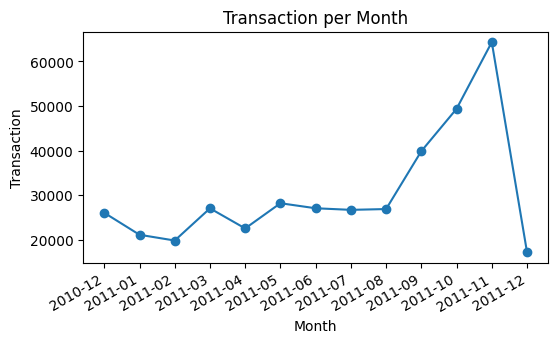

In [43]:
fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(Transaction_per_month1["Date"], 
        Transaction_per_month1["InvoiceNo"],
        marker = 'o')
ax.set(title = "Transaction per Month",
       xlabel = "Month",
       ylabel = "Transaction")
plt.xticks(rotation=30, ha='right')
plt.show()

In [44]:
# total amount

df["UnitPrice"].sum()

1142297.6540000008

In [45]:
pd.crosstab(index = df["Date"], columns = "UnitPrice", values = df["UnitPrice"], aggfunc = "sum")

col_0,UnitPrice
Date,
2010-12,80519.040
2011-01,65370.570
2011-02,61511.250
2011-03,82094.070
2011-04,67325.751
2011-05,87550.230
2011-06,80869.920
2011-07,72209.881
2011-08,74394.890


In [46]:
Amount_per_month = pd.crosstab(index = df["Date"], columns = "UnitPrice", values = df["UnitPrice"], aggfunc = "sum")
Amount_per_month1 = Amount_per_month.reset_index()

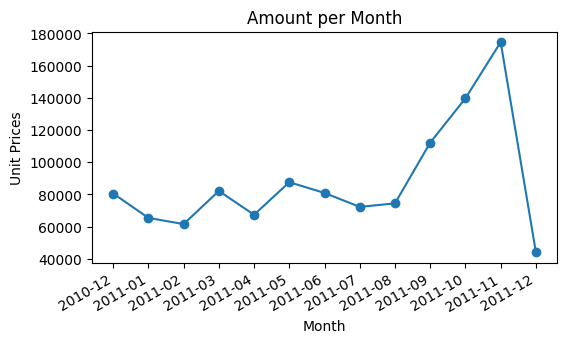

In [47]:
fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(Amount_per_month1["Date"], 
        Amount_per_month1["UnitPrice"],
        marker = 'o')
ax.set(title = "Amount per Month",
       xlabel = "Month",
       ylabel = "Unit Prices")
plt.xticks(rotation=30, ha='right')
plt.show()

In [48]:
# set waktu max

import datetime as dt
datemax = dt.datetime(2011,12,10)

In [49]:
rfm = df.groupby("CustomerID").agg({"InvoiceDate": lambda x: (datemax - x.max()).days,
                                    "InvoiceNo": lambda x: len(x),
                                    "UnitPrice": lambda x: x.sum()})
rfm

,InvoiceDate,InvoiceNo,UnitPrice
CustomerID,,,
12347.0,2,182,481.21
12348.0,75,27,18.71
12349.0,18,72,305.10
12350.0,310,16,25.30
12352.0,36,77,313.81
...,...,...,...
18280.0,277,10,47.65
18281.0,180,7,39.36
18282.0,7,12,62.39


In [50]:
rfm.rename(columns={"InvoiceDate": "Recency", "InvoiceNo": "Frequency", "UnitPrice": "Monetary"}, inplace=True)

In [51]:
rfm.describe()

,Recency,Frequency,Monetary
count,4332.000000,4332.000000,4332.000000
mean,92.180517,91.527239,263.688286
std,100.115614,228.556804,703.551888
min,0.000000,1.000000,0.170000
25%,17.000000,17.000000,49.162500
50%,50.000000,41.000000,121.595000
75%,142.000000,100.000000,281.647500
max,373.000000,7838.000000,22811.380000


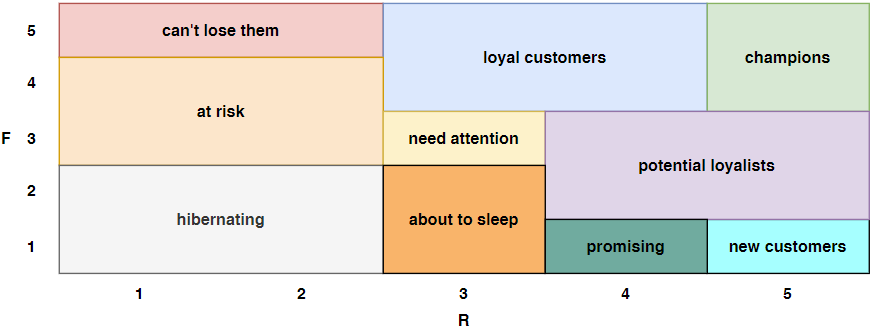

In [52]:
rfm["R_score"] = pd.qcut(rfm["Recency"], 5, labels = [5, 4, 3, 2, 1])

rfm["F_score"] = pd.qcut(rfm["Frequency"].rank(method = "first"), 5, labels = [1, 2, 3, 4, 5])

rfm["M_score"] = pd.qcut(rfm["Monetary"], 5, labels = [1, 2, 3, 4, 5])

rfm["RF_score"] = (rfm["R_score"].astype(str) + rfm["F_score"].astype(str))

rfm.head(8)

,Recency,Frequency,Monetary,R_score,F_score,M_score,RF_score
CustomerID,,,,,,,
12347.0,2,182,481.21,5,5,5,55
12348.0,75,27,18.71,2,2,1,22
12349.0,18,72,305.10,4,4,4,44
12350.0,310,16,25.30,1,2,1,12
12352.0,36,77,313.81,3,4,4,34
12353.0,204,4,24.30,1,1,1,11
12354.0,232,58,261.22,1,3,4,13
12355.0,214,13,54.65,1,1,2,11


In [53]:
seg_map = {
    r"[1-2][1-2]": "hibernating",
    r"[1-2][3-4]": "at_risk",
    r"[1-2]5": "cant_lose_them",
    r"3[1-2]": "about_to_sleep",
    r"33": "need_attention",
    r"[3-4][4-5]": "loyal_customers",
    r"41": "promising",
    r"51": "new_customers",
    r"[4-5][2-3]": "potential_loyalists",
    r"5[4-5]": "champions"
}

rfm['Segment'] = rfm['RF_score'].replace(seg_map, regex=True)

In [54]:
rfm

,Recency,Frequency,Monetary,R_score,F_score,M_score,RF_score,Segment
CustomerID,,,,,,,,
12347.0,2,182,481.21,5,5,5,55,champions
12348.0,75,27,18.71,2,2,1,22,hibernating
12349.0,18,72,305.10,4,4,4,44,loyal_customers
12350.0,310,16,25.30,1,2,1,12,hibernating
12352.0,36,77,313.81,3,4,4,34,loyal_customers
...,...,...,...,...,...,...,...,...
18280.0,277,10,47.65,1,1,2,11,hibernating
18281.0,180,7,39.36,1,1,2,11,hibernating
18282.0,7,12,62.39,5,1,2,51,new_customers


In [55]:
rfm[["Segment", "RF_score"]].groupby("Segment").agg("count").sort_values("RF_score", ascending = False)

,RF_score
Segment,
hibernating,1059
loyal_customers,797
champions,628
at_risk,581
potential_loyalists,502
about_to_sleep,314
need_attention,209
promising,99
cant_lose_them,84


In [56]:
rfm[["Segment", "Recency", "Frequency", "Monetary"]].groupby("Segment").agg(["mean", "min", "max"])

Recency            Frequency               Monetary  \
                           mean min  max        mean  min   max        mean   
Segment                                                                       
about_to_sleep        52.407643  33   71   15.652866    1    29   51.113025   
at_risk              167.179002  72  373   56.096386   29   119  169.228107   
cant_lose_them       143.702381  72  372  181.345238  122   542  529.988226   
champions              5.713376   0   14  285.035032   58  7838  800.545064   
hibernating          209.256846  72  373   13.345609    1    29   47.985016   
loyal_customers       33.947302  15   71  155.178168   58  1203  435.956311   
need_attention        51.794258  33   71   40.913876   29    58  121.956029   
new_customers          7.135593   1   14    7.338983    1    13   27.016780   
potential_loyalists   15.780876   0   32   34.346614   14    58  104.600361   
promising             22.757576  15   32    7.252525    1    13   28.281111   

                                       
                        min       max  
Segment                                
about_to_sleep         0.39    310.26  
at_risk               22.15    764.44  
cant_lose_them       215.49   1425.53  
champions             51.02  22811.38  
hibernating            0.17    590.00  
loyal_customers       58.53   2596.55  
need_attention        31.23    318.19  
new_customers          2.08    188.32  
potential_loyalists   11.36    332.63  
promising              0.29    271.50

#### Conclusion and Action Plans

- Between December 2010 and December 2011, there were approximately 396496 transactions, totaling 1142297.65.
- The most prevalent group after being categorized into the RF table is hibernation. The user's last visit was long back, visits are not often, and has not spent much.
- On average the hibernation group did not make transactions for more than 200 days.
- Promising and new customers need to be treated by sending promo and discount advertisements because this group is quite sensitive to price.

https://docs.google.com/document/d/16QOeUQfK_5I4BuyqZZ6fPyK3IOljFn_NjEs21RKXTnU/edit